# Perplexity Analysis

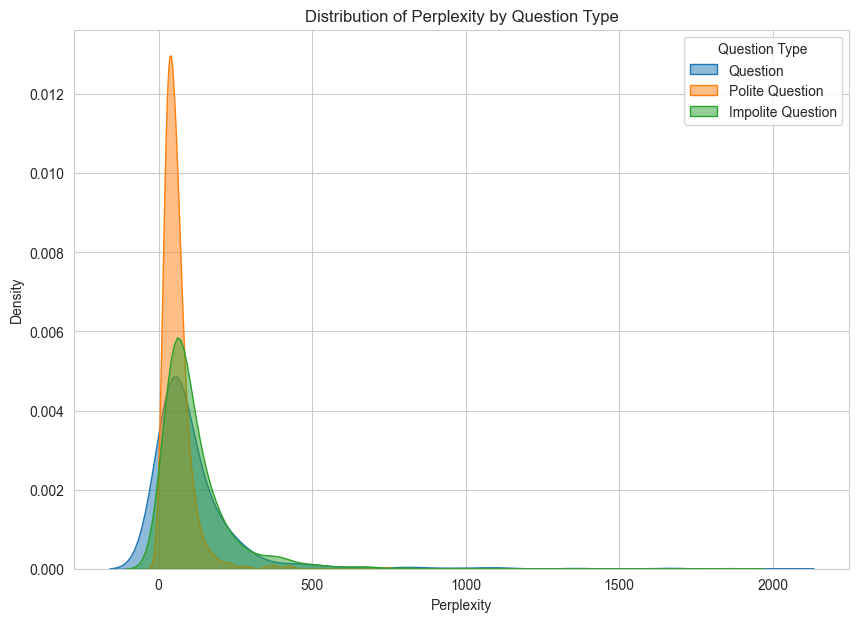

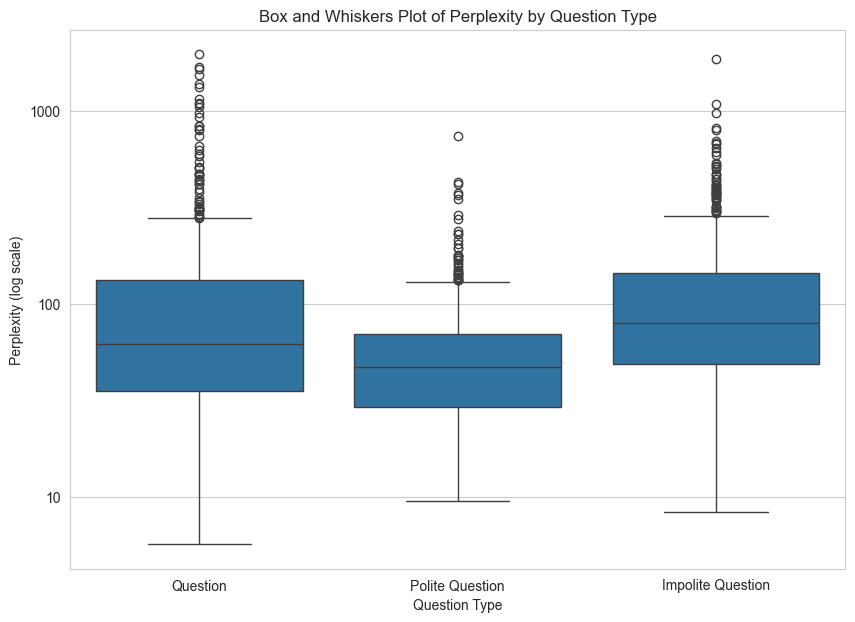

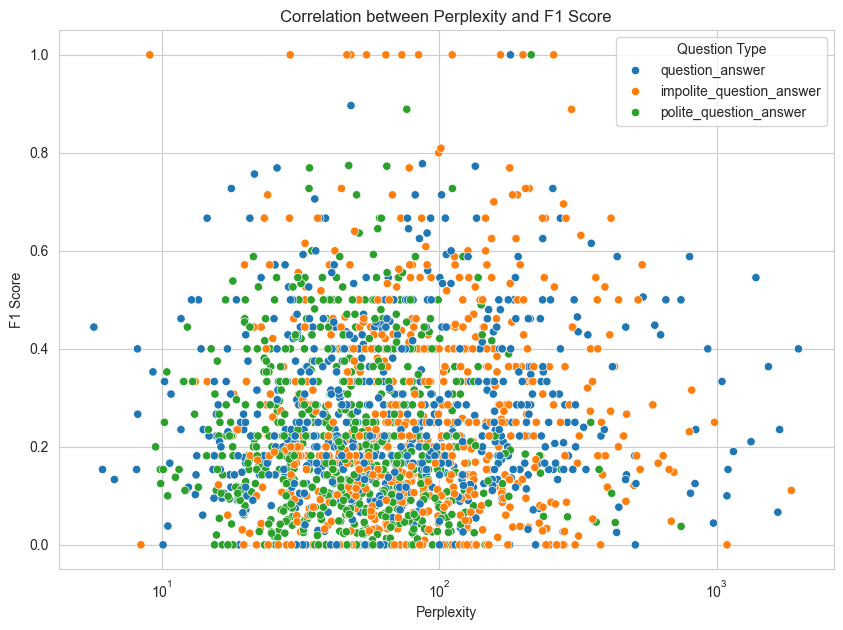

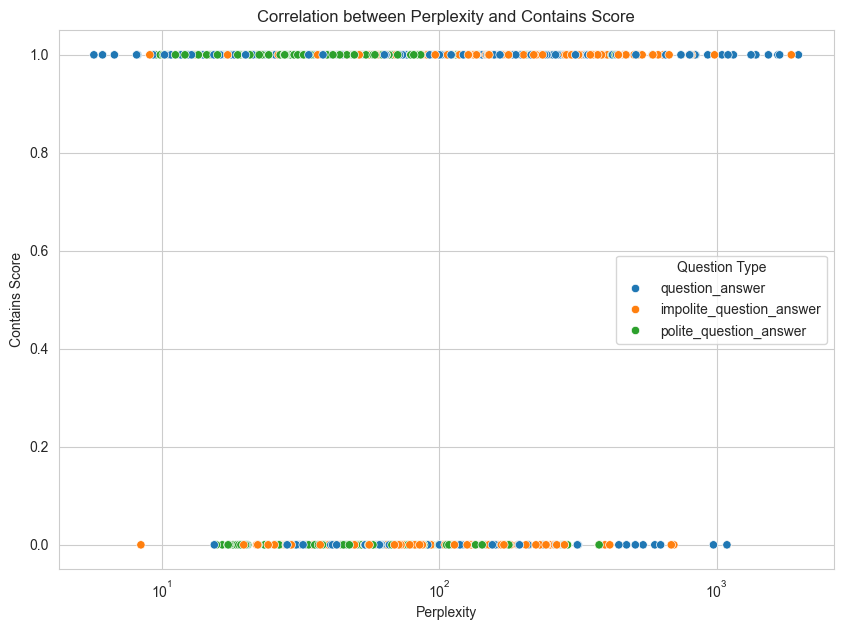

Correlation coefficient between perplexity and contains score: 0.002667956563031105
Correlation coefficient between perplexity and F1 score: 0.03243236871612395


In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON data
with open('perplexity_results.json', 'r') as file:
    data = json.load(file)

# Prepare the data for plotting
records = []
for entry in data:
    for question_type in ['question', 'polite_question', 'impolite_question']:
        if question_type in entry and 'perplexity' in entry[question_type]:
            records.append({
                'Question Type': question_type.replace('_', ' ').title(),
                'Perplexity': entry[question_type]['perplexity']
            })

# Convert to DataFrame
df = pd.DataFrame(records)

# Set plot style
sns.set_style('whitegrid')

# Plot the distribution of perplexity by question type
plt.figure(figsize=(10,7))
for question_type in df['Question Type'].unique():
    sns.kdeplot(
        data=df[df['Question Type'] == question_type],
        x='Perplexity',
        label=question_type,
        common_norm=False,
        fill=True,
        alpha=0.5
    )
plt.title('Distribution of Perplexity by Question Type')
plt.xlabel('Perplexity')
plt.ylabel('Density')
plt.legend(title='Question Type')
plt.show()

import matplotlib.ticker as ticker

# Plot the box and whiskers plot of perplexity by question type with a logarithmic scale
plt.figure(figsize=(10,7))
sns.boxplot(x='Question Type', y='Perplexity', data=df)
plt.yscale('log')
plt.title('Box and Whiskers Plot of Perplexity by Question Type')
plt.xlabel('Question Type')
plt.ylabel('Perplexity (log scale)')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

# Load the CSV data
evaluation_df = pd.read_csv('evaluation_results.csv')

# Load the JSON data
with open('perplexity_results.json', 'r') as file:
    perplexity_data = json.load(file)

# Prepare the perplexity data for merging
perplexity_records = []
for entry in perplexity_data:
    for question_type in ['question', 'polite_question', 'impolite_question']:
        if question_type in entry and 'perplexity' in entry[question_type]:
            perplexity_records.append({
                'id': entry.get('id', ''),
                'answer_type': question_type + '_answer',
                'perplexity': entry[question_type]['perplexity'],
                'question': entry[question_type].get('question', '')
            })

# Convert to DataFrame
perplexity_df = pd.DataFrame(perplexity_records)

# Merge the evaluation data with the perplexity data
merged_df = pd.merge(evaluation_df, perplexity_df, on=['question', 'answer_type'])

# Set plot style
sns.set_style('whitegrid')

# Plot correlation between perplexity and F1 score
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='perplexity', y='F1', hue='answer_type')
plt.title('Correlation between Perplexity and F1 Score')
plt.xlabel('Perplexity')
plt.ylabel('F1 Score')
plt.xscale('log')
plt.legend(title='Question Type')
plt.show()

# Plot correlation between perplexity and contains score
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='perplexity', y='contains', hue='answer_type')
plt.title('Correlation between Perplexity and Contains Score')
plt.xlabel('Perplexity')
plt.ylabel('Contains Score')
plt.xscale('log')
plt.legend(title='Question Type')
plt.show()

# Calculate the correlation coefficient between perplexity and contains score
correlation = merged_df[['perplexity', 'contains']].corr(method='pearson').iloc[0, 1]
print(f'Correlation coefficient between perplexity and contains score: {correlation}')

# Calculate correlation coefficient between perplexity and F1 score
correlation = merged_df[['perplexity', 'F1']].corr(method='pearson').iloc[0, 1]
print(f'Correlation coefficient between perplexity and F1 score: {correlation}')

# Perplexity Per Token

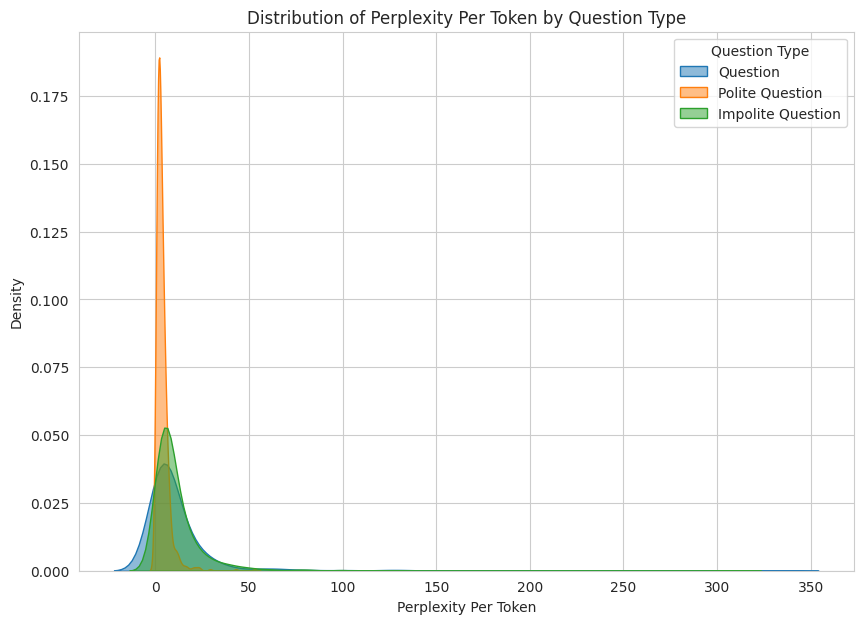

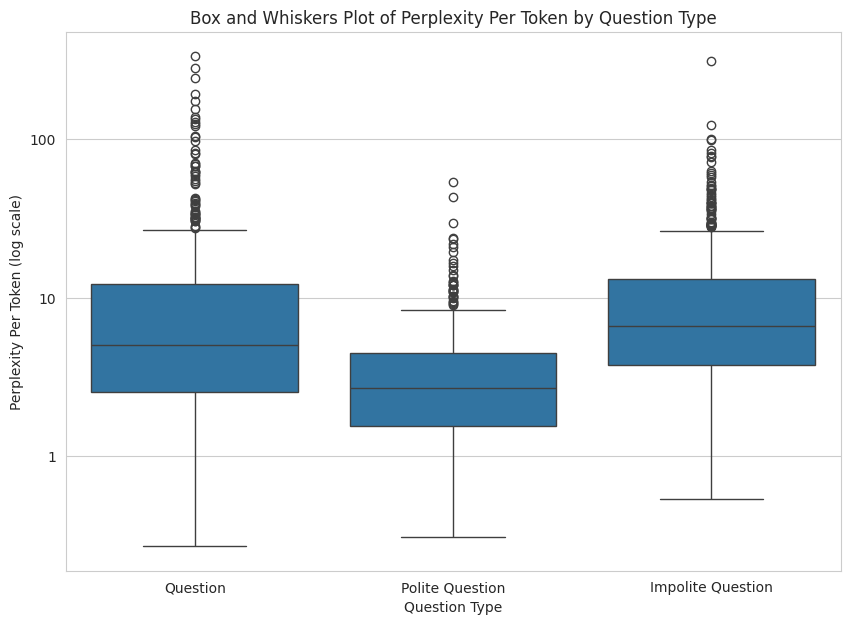

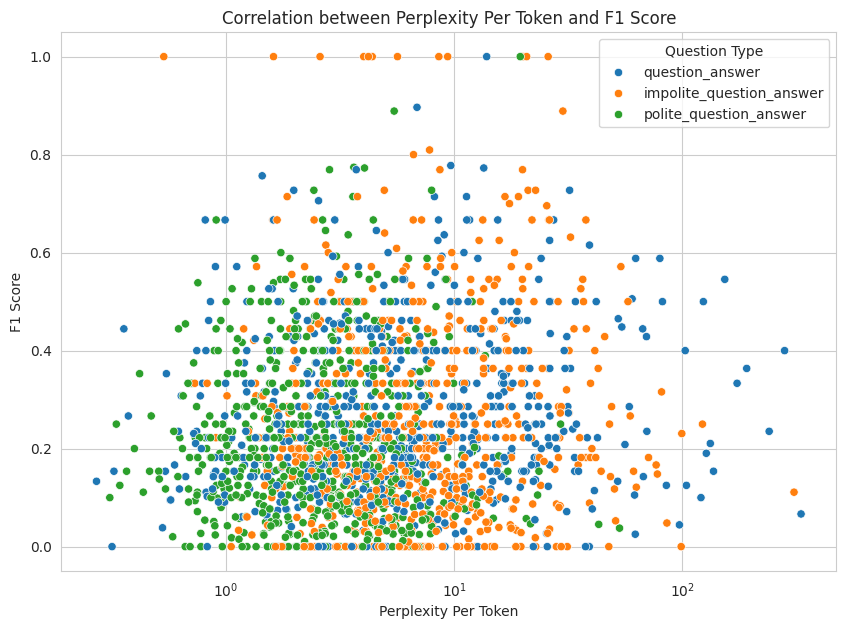

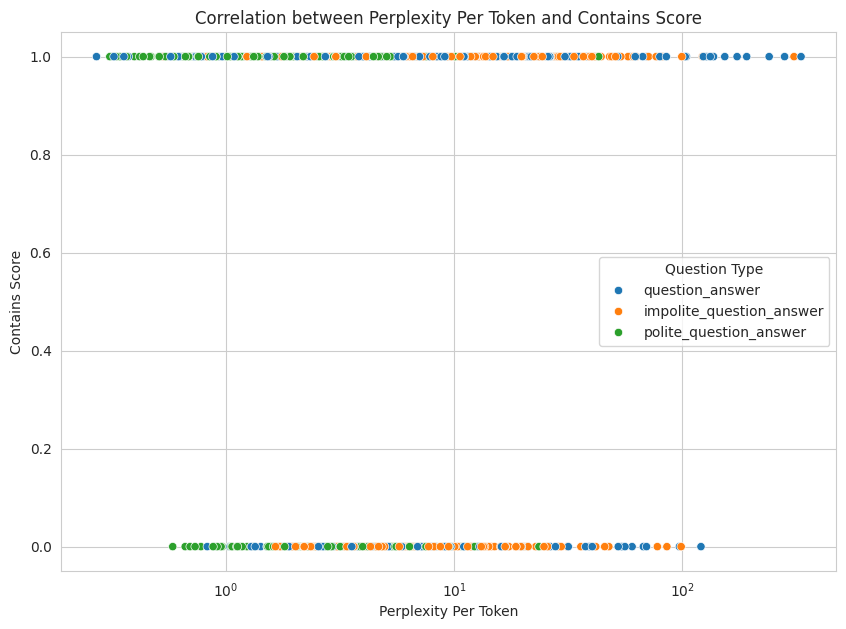

Correlation coefficient between perplexity per token and contains score: 0.0030772153057056716
Correlation coefficient between perplexity per token and F1 score: 0.03585633739918309


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON data
with open('perplexity_results.json', 'r') as file:
    data = json.load(file)

# Prepare the data for plotting
records = []
for entry in data:
    for question_type in ['question', 'polite_question', 'impolite_question']:
        if question_type in entry and 'perplexity' in entry[question_type]:
            perplexity = entry[question_type]['perplexity']
            num_tokens = len(entry[question_type]['tokens'])
            perplexity_per_token = perplexity / num_tokens
            records.append({
                'Question Type': question_type.replace('_', ' ').title(),
                'Perplexity Per Token': perplexity_per_token,
                'num_tokens': num_tokens
            })

# Convert to DataFrame
df = pd.DataFrame(records)

# Set plot style
sns.set_style('whitegrid')

# Plot the distribution of perplexity per token by question type
plt.figure(figsize=(10,7))
for question_type in df['Question Type'].unique():
    sns.kdeplot(
        data=df[df['Question Type'] == question_type],
        x='Perplexity Per Token',
        label=question_type,
        common_norm=False,
        fill=True,
        alpha=0.5
    )
plt.title('Distribution of Perplexity Per Token by Question Type')
plt.xlabel('Perplexity Per Token')
plt.ylabel('Density')
plt.legend(title='Question Type')
plt.show()

import matplotlib.ticker as ticker

# Plot the box and whiskers plot of perplexity per token by question type with a logarithmic scale
plt.figure(figsize=(10,7))
sns.boxplot(x='Question Type', y='Perplexity Per Token', data=df)
plt.yscale('log')
plt.title('Box and Whiskers Plot of Perplexity Per Token by Question Type')
plt.xlabel('Question Type')
plt.ylabel('Perplexity Per Token (log scale)')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

# Load the CSV data
evaluation_df = pd.read_csv('evaluation_results.csv')

# Prepare the perplexity data for merging
perplexity_records = []
for entry in data:
    for question_type in ['question', 'polite_question', 'impolite_question']:
        if question_type in entry and 'perplexity' in entry[question_type]:
            perplexity = entry[question_type]['perplexity']
            num_tokens = len(entry[question_type]['tokens'])
            perplexity_per_token = perplexity / num_tokens
            perplexity_records.append({
                'id': entry.get('id', ''),
                'answer_type': question_type + '_answer',
                'perplexity_per_token': perplexity_per_token,
                'question': entry[question_type].get('question', '')
            })

# Convert to DataFrame
perplexity_df = pd.DataFrame(perplexity_records)

# Merge the evaluation data with the perplexity data
merged_df = pd.merge(evaluation_df, perplexity_df, on=['question', 'answer_type'])

# Set plot style
sns.set_style('whitegrid')

# Plot correlation between perplexity per token and F1 score
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='perplexity_per_token', y='F1', hue='answer_type')
plt.title('Correlation between Perplexity Per Token and F1 Score')
plt.xlabel('Perplexity Per Token')
plt.ylabel('F1 Score')
plt.xscale('log')
plt.legend(title='Question Type')
plt.show()

# Plot correlation between perplexity per token and contains score
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='perplexity_per_token', y='contains', hue='answer_type')
plt.title('Correlation between Perplexity Per Token and Contains Score')
plt.xlabel('Perplexity Per Token')
plt.ylabel('Contains Score')
plt.xscale('log')
plt.legend(title='Question Type')
plt.show()

# Calculate the correlation coefficient between perplexity per token and contains score
correlation = merged_df[['perplexity_per_token', 'contains']].corr(method='pearson').iloc[0, 1]
print(f'Correlation coefficient between perplexity per token and contains score: {correlation}')

# Calculate correlation coefficient between perplexity per token and F1 score
correlation = merged_df[['perplexity_per_token', 'F1']].corr(method='pearson').iloc[0, 1]
print(f'Correlation coefficient between perplexity per token and F1 score: {correlation}')

# Politeness Evaluation

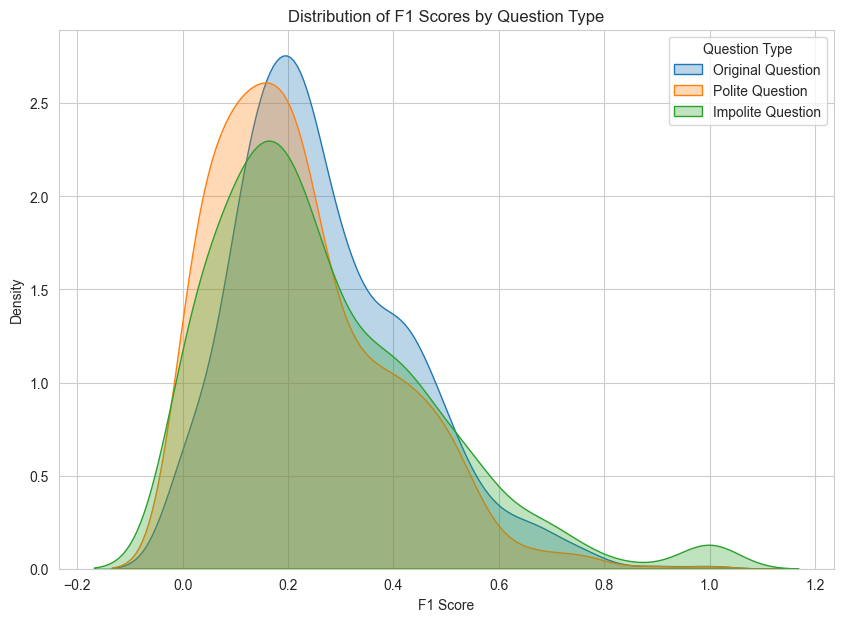

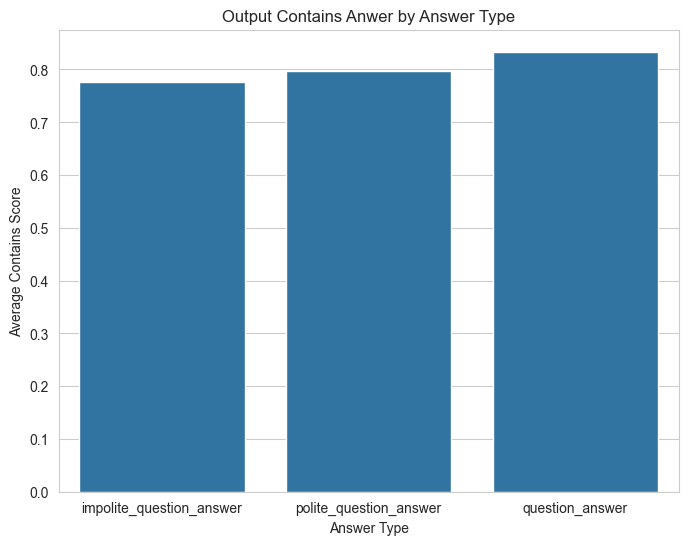

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('evaluation_results.csv')

# Map 'answer_type' to more readable labels
answer_type_mapping = {
    'question_answer': 'Original Question',
    'polite_question_answer': 'Polite Question',
    'impolite_question_answer': 'Impolite Question'
}

df['Question Type'] = df['answer_type'].map(answer_type_mapping)

# Set plot style
sns.set_style('whitegrid')

# Plot overlapping distributions of F1 scores one at a time
plt.figure(figsize=(10,7))

for question_type, label in answer_type_mapping.items():
    subset = df[df['answer_type'] == question_type]
    sns.kdeplot(
        data=subset,
        x='F1',
        label=label,
        common_norm=False,
        fill=True,
        alpha=0.3
    )

plt.title('Distribution of F1 Scores by Question Type')
plt.xlabel('F1 Score')
plt.ylabel('Density')
plt.legend(title='Question Type')
plt.show()

# Convert 'contains' column to numeric if necessary
df['contains'] = df['contains'].astype(int)

# Group data by 'answer_type' and calculate mean scores
grouped = df.groupby('answer_type', as_index=False).agg({
    'contains': 'mean'
})

# Set plot style
sns.set_style('whitegrid')

# Plot Contains scores
plt.figure(figsize=(8,6))
sns.barplot(x='answer_type', y='contains', data=grouped)
plt.title('Output Contains Anwer by Answer Type')
plt.xlabel('Answer Type')
plt.ylabel('Average Contains Score')
plt.show()

# Correctness Variations

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_55230/2803087730.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wrapped_labels, y=category_percentages.values, palette='viridis')


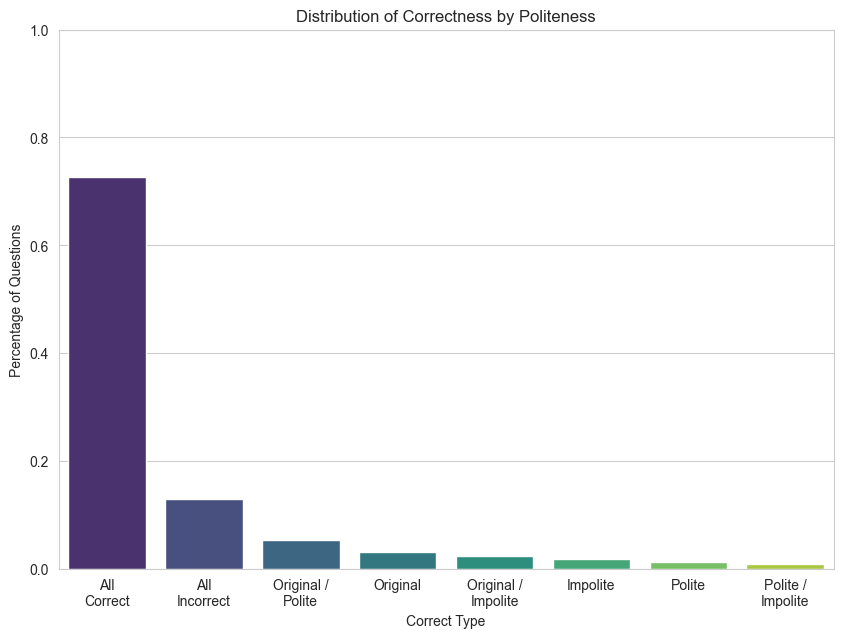

Category
All Correct            0.726048
All Incorrect          0.128743
Original / Polite      0.052395
Original               0.031437
Original / Impolite    0.023952
Impolite               0.017964
Polite                 0.011976
Polite / Impolite      0.007485
Name: count, dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Load the CSV data
df = pd.read_csv('evaluation_results.csv')

# Pivot the data to have one row per question with columns for each answer type
pivot_df = df.pivot(index='id', columns='answer_type', values='contains')

# Define a function to categorize the questions
def categorize_question(row):
    if row['question_answer'] and row['polite_question_answer'] and row['impolite_question_answer']:
        return 'All Correct'
    elif not row['question_answer'] and not row['polite_question_answer'] and not row['impolite_question_answer']:
        return 'All Incorrect'
    elif row['question_answer'] and not row['polite_question_answer'] and not row['impolite_question_answer']:
        return 'Original'
    elif not row['question_answer'] and row['polite_question_answer'] and not row['impolite_question_answer']:
        return 'Polite'
    elif not row['question_answer'] and not row['polite_question_answer'] and row['impolite_question_answer']:
        return 'Impolite'
    elif row['question_answer'] and row['polite_question_answer'] and not row['impolite_question_answer']:
        return 'Original / Polite'
    elif row['question_answer'] and not row['polite_question_answer'] and row['impolite_question_answer']:
        return 'Original / Impolite'
    elif not row['question_answer'] and row['polite_question_answer'] and row['impolite_question_answer']:
        return 'Polite / Impolite'
    else:
        return 'Error'

# Apply the function to categorize each question
pivot_df['Category'] = pivot_df.apply(categorize_question, axis=1)

# Count the number of questions in each category
category_counts = pivot_df['Category'].value_counts()

# Calculate the percentage for each category
category_percentages = (category_counts / category_counts.sum())

# Wrap the x-axis labels
wrapped_labels = [textwrap.fill(label, 10) for label in category_percentages.index]

# Plot the distribution of question categories as percentages
plt.figure(figsize=(10, 7))
sns.barplot(x=wrapped_labels, y=category_percentages.values, palette='viridis')
plt.title('Distribution of Correctness by Politeness')
plt.xlabel('Correct Type')
plt.ylabel('Percentage of Questions')
plt.ylim(0, 1)  # Set y-axis limit to 100%
plt.show()

# Print the percentages for each category
print(category_percentages)

# Politeness - Accuracy Correlation

In [22]:
politeness_evaluation_df.head()

,id,title,context,question,answers,polite_question,impolite_question,original_rating,polite_rating,impolite_rating,polite_diff,impolite_diff
0,571a96444faf5e1900b8aadf,Ashkenazi_Jews,New developments in Judaism often transcend di...,What do many Ashkenazi Jews study outside of t...,"{'text': ['Kabbalah'], 'answer_start': [357]}",Would you kindly tell me what many Ashkenazi J...,"What do Ashkenazi Jews study outside Yeshiva, ...",3,5,3,2,0
1,572f34be947a6a140053c7ef,Washington_University_in_St._Louis,During the three years following its inception...,What name was selected by the Board of Trustee...,"{'text': ['Washington Institute'], 'answer_sta...",Would you kindly tell me what name was selecte...,Just tell me what name the Board picked in 185...,3,5,3,2,0
2,572f575504bcaa1900d76865,Railway_electrification_system,To prevent the risk of out-of-phase supplies m...,What was the part of wire in Phase Break secti...,"{'text': ['The earthed section'], 'answer_star...",Would you please explain which part of the wir...,What's the wire part that causes arcs? Tell me...,3,5,2,2,1
3,570af6316b8089140040f63a,Gregorian_calendar,"To unambiguously specify the date, dual dating...",What does duel dating use to show the date?,"{'text': ['two consecutive years'], 'answer_st...",Would you kindly explain what duel dating uses...,Just tell me what duel dating uses for the date.,3,4,2,1,1
4,56cc83056d243a140015efd8,IPod,Some independent stereo manufacturers includin...,What companies have developed iPod interfacing...,"{'text': ['JVC, Pioneer, Kenwood, Alpine, Sony...",Could you kindly let me know which companies h...,Just tell me which companies did the iPod ster...,3,5,3,2,0


In [15]:
performance_df.head()

,id,question,answer_type,EM,F1,contains
0,571a96444faf5e1900b8aadf,What do many Ashkenazi Jews study outside of t...,question_answer,0,0.200000,True
1,571a96444faf5e1900b8aadf,"What do Ashkenazi Jews study outside Yeshiva, ...",impolite_question_answer,0,0.142857,True
2,571a96444faf5e1900b8aadf,Would you kindly tell me what many Ashkenazi J...,polite_question_answer,0,0.200000,True
3,572f34be947a6a140053c7ef,What name was selected by the Board of Trustee...,question_answer,0,0.333333,True
4,572f34be947a6a140053c7ef,Just tell me what name the Board picked in 185...,impolite_question_answer,0,0.333333,True


In [18]:
# load in dataframes
performance_df = pd.read_csv('evaluation_results.csv')
politeness_evaluation_df = pd.read_csv('politeness_evaluation_results.csv')

# Melt politeness_evaluation_df to long format
politeness_melted = politeness_evaluation_df.melt(
    id_vars=['id'],
    value_vars=['original_rating', 'polite_rating', 'impolite_rating'],
    var_name='answer_type',
    value_name='rating'
)

# Map the answer_type in politeness_melted to match values in performance_df
answer_type_mapping = {
    'original_rating': 'question_answer',
    'polite_rating': 'polite_question_answer',
    'impolite_rating': 'impolite_question_answer'
}

politeness_melted['answer_type'] = politeness_melted['answer_type'].map(answer_type_mapping)

# Merge the dataframes on 'id' and 'answer_type'
final_df = pd.merge(
    performance_df[['id', 'answer_type', 'EM', 'F1', 'contains']],
    politeness_melted[['id', 'answer_type', 'rating']],
    on=['id', 'answer_type'],
    how='left'
)

# Display the final dataframe
(final_df.head())

,id,answer_type,EM,F1,contains,rating
0,571a96444faf5e1900b8aadf,question_answer,0,0.200000,True,3
1,571a96444faf5e1900b8aadf,impolite_question_answer,0,0.142857,True,3
2,571a96444faf5e1900b8aadf,polite_question_answer,0,0.200000,True,5
3,572f34be947a6a140053c7ef,question_answer,0,0.333333,True,3
4,572f34be947a6a140053c7ef,impolite_question_answer,0,0.333333,True,3


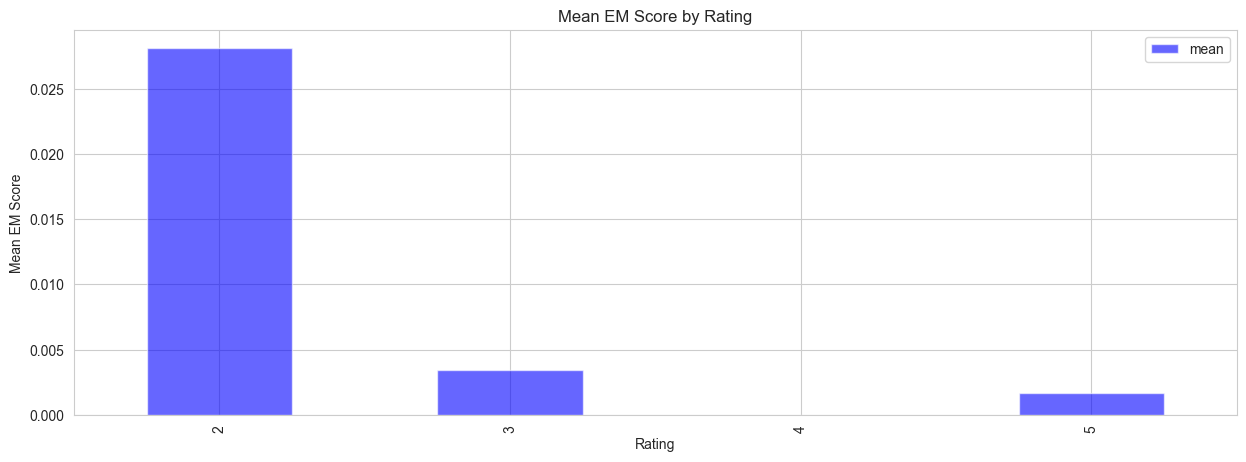

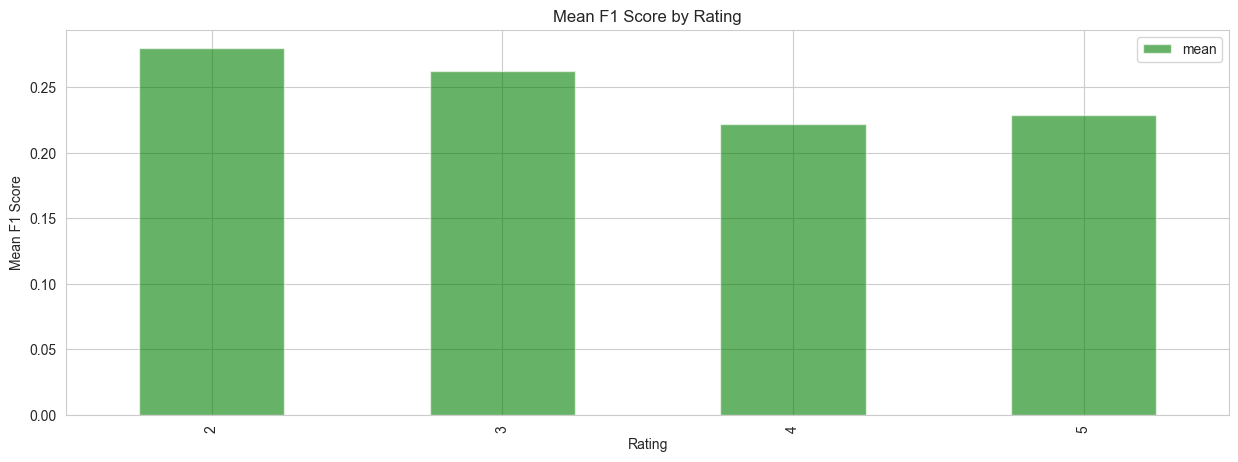

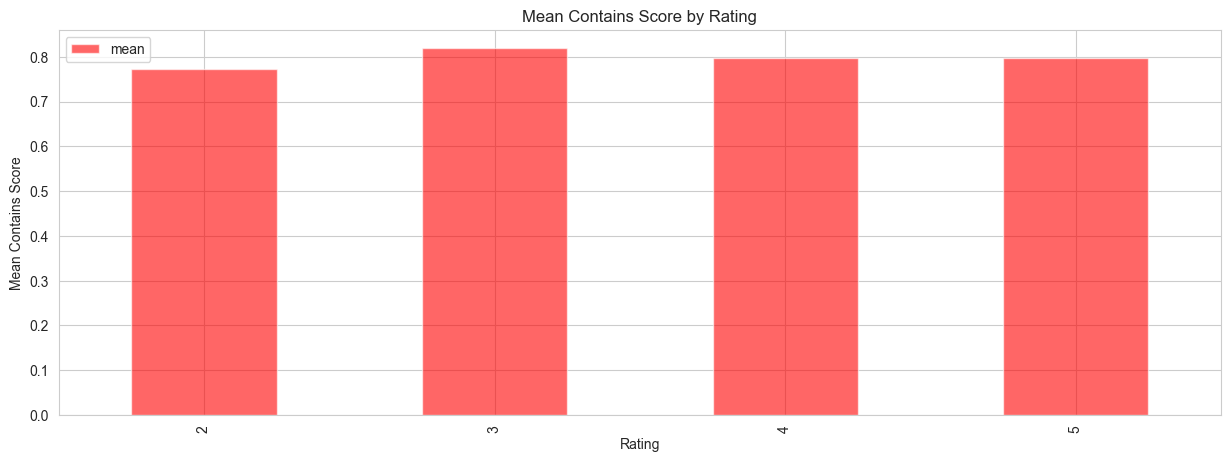

In [26]:
# Group by 'rating' and calculate statistics
rating_stats = final_df.groupby('rating').agg({
    'EM': ['mean', 'median', 'std'],
    'F1': ['mean', 'median', 'std'],
    'contains': ['mean', 'median', 'std']
})

# Display the statistics
(rating_stats)

# Plot the mean scores
rating_stats['EM']['mean'].plot(kind='bar', figsize=(15, 5), legend=True, color='blue', alpha=0.6)
plt.title('Mean EM Score by Rating')
plt.xlabel('Rating')
plt.ylabel('Mean EM Score')
plt.show()

rating_stats['F1']['mean'].plot(kind='bar', figsize=(15, 5), legend=True, color='green', alpha=0.6)
plt.title('Mean F1 Score by Rating')
plt.xlabel('Rating')
plt.ylabel('Mean F1 Score')
plt.show()

rating_stats['contains']['mean'].plot(kind='bar', figsize=(15, 5), legend=True, color='red', alpha=0.6)
plt.title('Mean Contains Score by Rating')
plt.xlabel('Rating')
plt.ylabel('Mean Contains Score')
plt.show()